In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.stats as stats
import math
import pandas as pd

## Question 1

In [ ]:
theta = 2
K = 1

In [ ]:
def estimate_theta(n):  
  X = theta *  np.random.weibull(1, n)     
  theta_hat = np.sum(X)/n
  
  return theta_hat

In [ ]:
nval = [1, 10, 100, 1000, 10000]   #list of values of N
runs = 10000  #no. of runs
thetas = np.zeros((runs, len(nval))) 

#estimating sigma
for j, n in enumerate(nval):
  for i in range(runs):
    thetas[i, j] = estimate_theta(n)

a) Tabulating E[theta_hat]

b) Tabulating var(theta_hat)

var(theta_hat) is plotted against each n.

We observe that, as the number of samples increase to infinity, for a single trial run, the estimated theta hat converges to 2 and estimated variance converges to 4

Parts a) and b)

In [ ]:
var = np.zeros(len(nval))
expec = np.zeros(len(nval))

#printing estimation of sigma and variance for 100 runs
for j,n in enumerate(nval):
  var[j] = np.var(thetas[:, j])
  expec[j] = np.mean(thetas[:, j])
  print("N: ", n, "E[theta]: ", expec[j], "var: ", var[j])

N:  1 E[theta]:  2.0191932061746694 var:  4.062118829327427
N:  10 E[theta]:  1.9990052867084203 var:  0.3855557643450547
N:  100 E[theta]:  1.9987820918654018 var:  0.040018444012403946
N:  1000 E[theta]:  1.9999929423313938 var:  0.003996665646604442
N:  10000 E[theta]:  2.0000877100792254 var:  0.0004016601194975156


Part c)

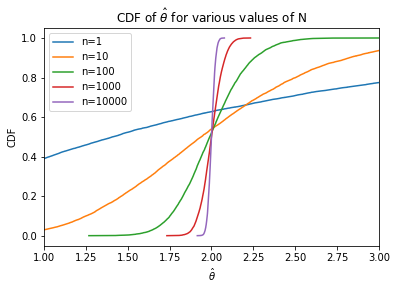

In [ ]:
# plt.rcParams['figure.figsize'] = 9,6
# plt.rcParams['font.size'] = 15
# plt.rcParams['text.usetex'] = True





probs=np.array(range(runs))/float(runs)
for j,n in enumerate(nval):
    sortVal = np.sort(thetas[:,j])
    plt.plot(sortVal, probs,label="n={n}".format(n=n))
plt.xlim([1,3])
plt.title(r"CDF of $\hat{\theta}$ for various values of N")
plt.xlabel(r"$\hat{\theta}$")
plt.ylabel("CDF")
plt.legend()
plt.show()

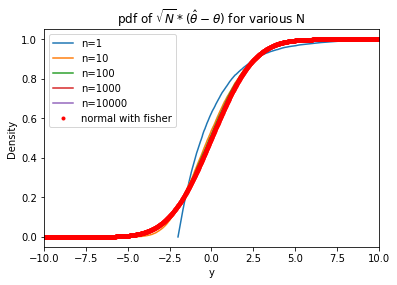

In [ ]:
#cdf with fisher
s=1
x=np.arange(-10,10,0.01)                 
fisher=1/theta**2

nvalues=np.empty(np.shape(thetas))
for j,n in enumerate(nval):
  for i in range(runs):
    nvalues[i,j]=n
theta_ecor=np.multiply(np.sqrt(nvalues),(thetas-theta))

probs=np.array(range(runs))/float(runs)
for j,n in enumerate(nval):
    sortVal = np.sort(theta_ecor[:,j])
    plt.plot(sortVal, probs,label="n={n}".format(n=n))
plt.plot(x,stats.norm.cdf(x, 0, np.sqrt(1/fisher)),'r.', label="normal with fisher")
plt.xlim([-10,10])
plt.title(r"pdf of $\sqrt{N}*(\hat{\theta} - \theta)$ for various N")
plt.xlabel("y")
plt.ylabel("Density")
plt.legend()
plt.show()

Part d)

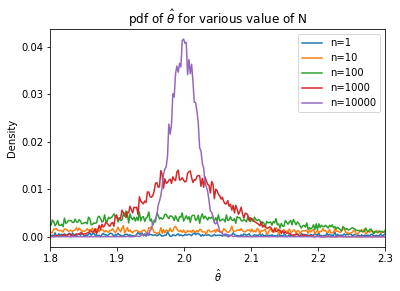

In [ ]:
width=0.002 
b=np.arange(0,10,width)
for j,n in enumerate(nval):
    if n!=0:
        probs, b = np.histogram(thetas[:,j], bins=b) # bin it into n = N//10 bins
        probs=probs/runs
        bincentre = b[:-1] + (b[1] - b[0])/2   # convert bin edges to centers
        plt.plot(bincentre, probs,label="n={n}".format(n=n))
        #plt.bar(bincentre, probs, align = 'center', width = width,label="n={n}".format(n=n))

plt.xlim([1.8,2.3])
plt.title(r"pdf of $\hat{\theta}$ for various value of N")
plt.xlabel(r"$\hat{\theta}$")
plt.ylabel("Density")
plt.legend()
plt.show()

E[theta_hat] = theta =  2 as for all n theoretically. 
But, practically, once theta_hat's value is found out, E[theta_hat] = theta_hat and as n->infinity, E[theta_hat]->theta. Since the expectation of the MLE of theta is equal to the parameter theta, the estimator is said to be unbiased.

CDF of the Weibull distribution

The CDF is given by 1-e^-((x/theta_hat)^k) for x>=0 and 0 otherwise

In [ ]:
#defining the parameters of the model
def weibull_q1():
  k = 1
  theta = 2
  N = [1, 10, 100, 1000, 10000]
  theta_estimates = []
  FI_data = []
  theta_hats=[]
  vars=[]
  for n in N:
    for i in range(1000):
      s = theta *  np.random.weibull(1, n)        #drawing n random samples from the weibull distribution
      theta_hat = np.sum(s)/n                     # MLE is simply the average of all the samples when k=1
      theta_hats.append(theta_hat)
      # var=0
      # for i in range(len(s)):
      #   var += (s[i]-theta_hat)**2
      # var = var/n
      # vars.append(var)

    theta_mean = np.mean(np.asarray(theta_hats))
    
    theta_estimates.append(theta_hat)
    FI_data.append(np.sqrt(n)*(theta_hat-theta))

  add_log(weibull_data, [theta_estimates[0],theta_estimates[1],theta_estimates[2],theta_estimates[3],theta_estimates[4],FI_data[0],FI_data[1],FI_data[2],FI_data[3],FI_data[4]])

As n->infinity, the estimated CDF from the MLE theta_hat converges to the true CDF

As n->infinity, the estimated PDF from the MLE theta_hat converges to the true PDF